Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

Edición 2022
<br>
<font color='MediumBlue'><strong><br>
Análisis y Visualización de Datos<br>
GRUPO 16 -Integrantes:<br></strong>
- Fernanda Borghello,<br>
- Santiago Pfluger,<br>
- Rodrigo Ruiz,<br>
- Alfonsina Szpeiner
</font>


#Trabajo práctico entregable - Parte 1

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

<font color='MediumBlue'><strong>
Paso 1: Se importan las librerias

In [180]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#seaborn.set_context('talk')

<font color='MediumBlue'><strong>
Paso 2: Lectura del data set

In [181]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [182]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


<font color='MediumBlue'><strong>
Paso 3: Seleccionar las columnas relevantes para analizar</strong><br>
Se consensua seleccionar como columnas relevantes: tools_prohramming_languages y salary_monthly_NETO

In [183]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

In [184]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

<font color='MediumBlue'><strong>
Paso 4: Se avanza con la eliminación de valores extremos y erróneos.

<font color='MediumBlue'>
a) Se comienza con la limpieza de los datos de la variable "tools_programming_languages"y se separan los lenguajes, uno en cada fila.

In [185]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '').replace('ninguno',' ')\
    .replace('.',' ').replace('-',' ').replace('programación',' ')\
    .replace('no',' ').replace('son',' ').replace('|',' ')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."


<font color='MediumBlue'>
Se arma un dataframe (df) con la frecuencia de respuestas para cada lenguaje.

In [186]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2513
1,sql,2156
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,net,824
9,typescript,779


<font color='MediumBlue'>
b) Se realiza la estadistica descriptiva de la variable salary_monthly_NETO
y un histograma de frecuencia

In [187]:
df_lang.salary_monthly_NETO.describe().round(2)

count      17070.00
mean      100679.11
std       105513.11
min            1.00
25%        54000.00
50%        80000.00
75%       110000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: float64

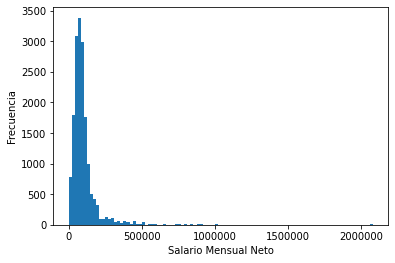

In [188]:
plt.hist(df_lang['salary_monthly_NETO'], bins = 100)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Salario Mensual Neto")
plt.ylabel("Frecuencia")
plt.show()

<font color='MediumBlue'>
Se observan outliers que afectan la distribución de los datos a un sesgo muy marcado hacia la izquierda y con una alta proporcion de valores cercanos a cero que no resultan verosímiles o de interés. Por ello se decide aplicar el método de percentiles para eliminar outliers. Como hay outliers muy pequeños (ie. 0/100) y muy grandes (ie. mayores a 1000000) se seleccionan como datos representativos para analizar a aquellos entre el percentil 10 y el 90 como puede verse a continuación. Luego se realiza un histograma para vizualizar los datos ya filtrados. Y se observa que la cantidad de datos no fue afectada en demasía luego del metodo aplicado (se conservan el 80% de los datos de salario).

In [189]:
Q1 = df_lang["salary_monthly_NETO"].quantile(.10)
Q3 = df_lang["salary_monthly_NETO"].quantile(.90)
IQR = Q3 - Q1
df_filt = df_lang[~((df_lang['salary_monthly_NETO']<(Q1))|(df_lang['salary_monthly_NETO']>(Q3)))]

df_filt['mediana'] = df_filt.groupby('programming_language')['salary_monthly_NETO'].transform('median')

print('Q1: {} ::: Q3: {}'.format(int(Q1),int(Q3)))
print("Tamaño df quitando outliers: ", df_filt.shape)
df_filt

Q1: 36882 ::: Q3: 170000
Tamaño df quitando outliers:  (14378, 5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages,mediana
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]",75000.0
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]",80000.0
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]",86000.0
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p...",88000.0
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p...",85000.0
...,...,...,...,...,...
6090,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,"[net, c#, cobol, css, html, javascript, php, s...",75000.0
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,"[net, c#, cobol, css, html, javascript, php, s...",80000.0
6090,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,"[net, c#, cobol, css, html, javascript, php, s...",75900.0
6090,sql,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,"[net, c#, cobol, css, html, javascript, php, s...",79000.0


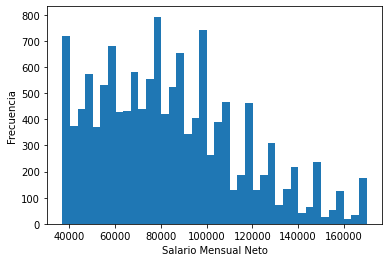

In [190]:
plt.hist(df_filt['salary_monthly_NETO'], bins = 40)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Salario Mensual Neto")
plt.ylabel("Frecuencia")
plt.show()

<font color='MediumBlue'>
c) Una vez seleccionado el rango de salarios "aceptables", se vuelve a trabajar con la variable tools_programming_languages para determinar aquellos que tengan un numero de respuestas "representativo" para considerar en el análisis.

In [191]:
language_count = df_filt.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count.head(20)

,language,frequency
0,javascript,2018
1,sql,1808
2,html,1500
3,python,1212
4,java,1210
5,css,1007
6,bash/shell,831
7,php,723
8,net,684
9,typescript,625


In [192]:
language_count.shape

(169, 2)

<font color='MediumBlue'>
Para seleccionar los lenguajes de interés se toma en cuenta la frecuencia con que estos aparecían en la base de datos. Se toma la determinación de descartar los lenguajes con una frecuencia menor al 0.1% del total de los datos. De este modo, la frecuencia mínima aceptada es 17.71 y se dejan 138 programas fuera de análisis. 

In [193]:
frecuencia_aceptada=len(df_lang['programming_language'])*0.001
print(frecuencia_aceptada)

17.71


In [194]:
Lenguajes_descartados=language_count[language_count['frequency']<frecuencia_aceptada]
Lenguajes_descartados.shape

(138, 2)

<font color='MediumBlue'>
A partir de ahora se trabaja con los lenguajes "no descartados", que son 31 en total.

In [195]:
lenguajes_nodescartados = language_count[language_count['frequency']>frecuencia_aceptada]
lenguajes_nodescartados

,language,frequency
0,javascript,2018
1,sql,1808
2,html,1500
3,python,1212
4,java,1210
5,css,1007
6,bash/shell,831
7,php,723
8,net,684
9,typescript,625


In [196]:
lenguajes_nodescartados.shape

(31, 2)

<font color='MediumBlue'><strong>
PASO 5. Con la base ya filtrada se realiza estadistica descriptiva, se calcula la mediana y frecuencia por lenguaje. Se realiza un boxplot ilustrativo.

In [197]:
NOT_interesting_languages = list(Lenguajes_descartados['language'].unique())
NOT_interesting_languages
filtered_df_filt = df_filt[~(df_filt.programming_language.isin(NOT_interesting_languages))]
filtered_df_filt[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages,mediana
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]",75000.0
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]",80000.0
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]",86000.0
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p...",88000.0
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p...",85000.0


Text(0, 0.5, 'Lenguaje de programación')

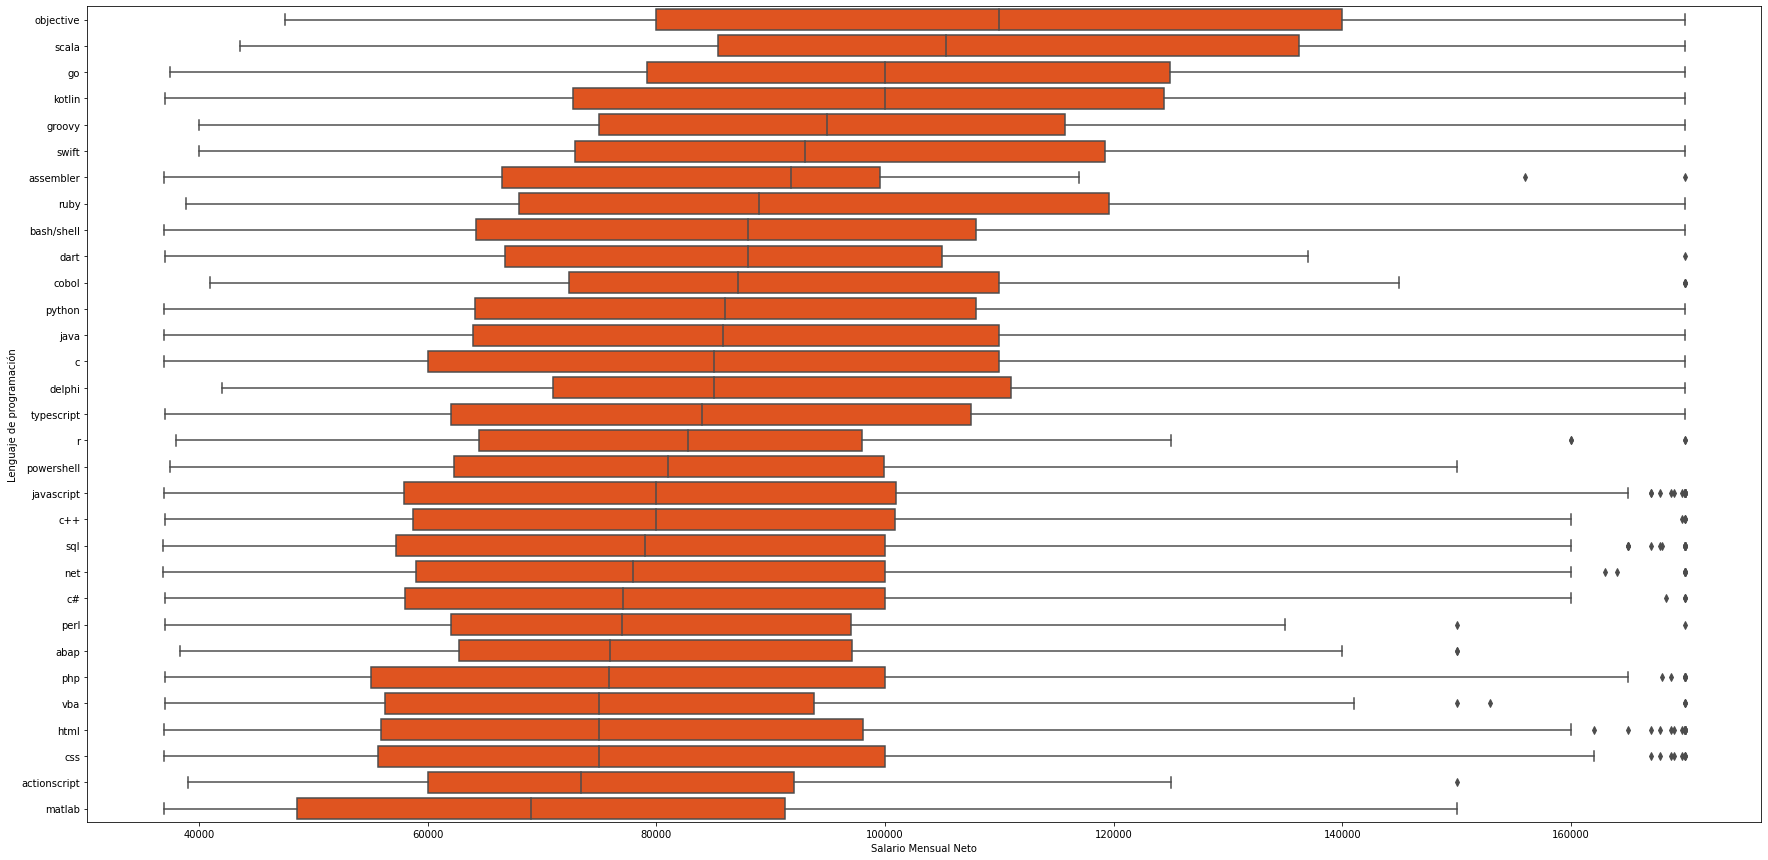

In [198]:
plt.figure(figsize=(30, 15))
sns.boxplot(data= filtered_df_filt.sort_values('mediana', ascending = False), x='salary_monthly_NETO', y='programming_language',
                color='orangered',)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Salario Mensual Neto")
plt.ylabel("Lenguaje de programación")

<font color='MediumBlue'>
Se adopta la mediana de salary_monthly_NETO como estadístico para determinar la línea de corte de análisis. La mediana resulta un parámetro más robusto que la media en casos de mucha variabilidad en los datos. Se ordena por casos y así se determinan los 10 lenguajes asociados a los mejores salarios. Se realiza un gráfico de conteos por lenguaje.

In [199]:
salario_median = filtered_df_filt.groupby(['programming_language']).median().round(2).reset_index().rename(columns={'programming_language' : 'language','salary_monthly_NETO': 'Salario_Mediana'})
join = pd.merge(lenguajes_nodescartados, salario_median, on='language', how='inner').sort_values('Salario_Mediana', ascending = False)
join.drop('Salario_Mediana', inplace=True, axis=1)
join

,language,frequency,mediana
25,objective,35,110000.0
18,scala,84,105337.5
15,kotlin,154,100000.0
11,go,229,100000.0
16,groovy,129,94960.0
19,swift,80,93000.0
29,assembler,23,91810.0
17,ruby,112,89000.0
26,dart,32,88000.0
6,bash/shell,831,88000.0


Text(-14.949999999999996, 0.5, 'Mediana de Salario Mensual Neto')

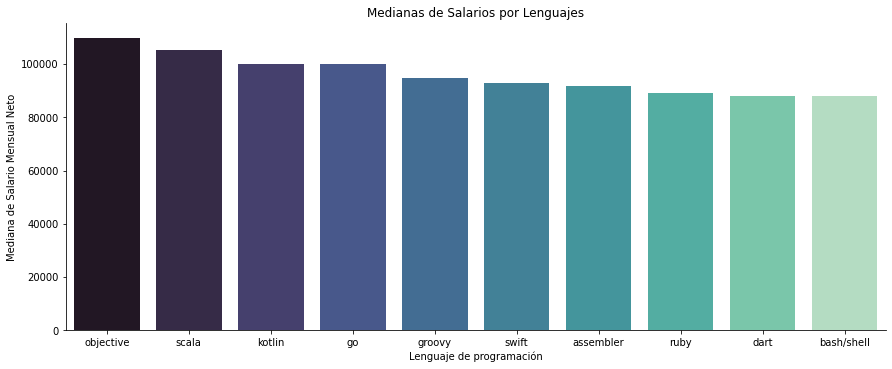

In [200]:
sns.catplot(x= 'language', y = 'mediana', kind = "bar", data = join[:10], palette='mako', height=5, aspect=2.5).set(title='Medianas de Salarios por Lenguajes')
plt.xlabel("Lenguaje de programación")
plt.ylabel("Mediana de Salario Mensual Neto")

<font color='MediumBlue'><strong>
CONCLUSION DEL ANALISIS y RESPUESTA A LA PREGUNTA INICIAL (¿Cuáles son los lenguajes de programación asociados a los mejores salarios):</strong><br>
Los 5 lenguajes de programación asociados a los mejores salarios son en OBJECTIVE, SCALA, KOTLIN, GO y GROOVY. Luego seguidos por swift, assembler, ruby, dart y bash/shell.

-------------------------------------------------------------------------------------

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

In [201]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df_origen = pd.read_csv(url)
df_origen.head()

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




<font color='MediumBlue'>
Las herramientas que pueden utilizarse para estudiar la distribucion y comportamiento de los datos: Estadística descriptiva, Histogramas, Tablas, análisis de correlación, mapas de calor, gráficos de barra, gráficos de distribución conjunta, boxplots, entre otros.

<font color='MediumBlue'>
Se seleccionan las columnas de las variables elegidas, teniendo en cuenta algunas extras que son indicadas para los siguientes puntos del práctico.

In [202]:
relevant_columns = ['profile_years_experience','salary_monthly_NETO','salary_satisfaction','profile_studies_level','profile_age','profile_gender','work_province']
df_a=df_origen[relevant_columns]
df_a.head()

,profile_years_experience,salary_monthly_NETO,salary_satisfaction,profile_studies_level,profile_age,profile_gender,work_province
0,3.0,43000.0,1,Universitario,26,Mujer,Ciudad Autónoma de Buenos Aires
1,5.0,63000.0,2,Universitario,29,Hombre,Corrientes
2,2.0,127000.0,3,Secundario,22,Mujer,Ciudad Autónoma de Buenos Aires
3,15.0,102000.0,3,Posgrado,39,Hombre,Corrientes
4,9.0,106000.0,1,Universitario,32,Hombre,Ciudad Autónoma de Buenos Aires


<font color='MediumBlue'>
El criterio para seleccionar las filas es similar al utilizado en la parte 1, incorporando criterios para quitar las filas donde no se cuente con datos válidos sobre la edad o satisfaccion respecto al salario sean descartadas.

In [203]:
Q1 = df_a["salary_monthly_NETO"].quantile(.10)
Q3 = df_a["salary_monthly_NETO"].quantile(.90)
IQR = Q3 - Q1
df_a= df_a[~((df_a['salary_monthly_NETO']<(Q1))|(df_a['salary_monthly_NETO']>(Q3)))]
print('Q1: {} ::: Q3: {}'.format(int(Q1),int(Q3)))
print("Tamaño df quitando outliers: ", df_a.shape)

Q1: 35000 ::: Q3: 150000
Tamaño df quitando outliers:  (4964, 7)


Text(0.5, 0, 'Años de experiencia')

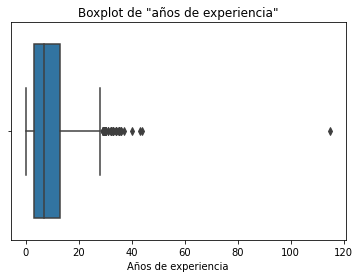

In [204]:
sns.boxplot(x=df_a['profile_years_experience']).set(title='Boxplot de "años de experiencia"')
plt.xlabel("Años de experiencia")

In [205]:
print('Años de experiencia máximo informado:',df_a['profile_years_experience'].max())

Años de experiencia máximo informado: 115.0


<font color='MediumBlue'>
115 años de experiencia no sería un valor aceptado, por lo que se decida quitar esa fila de la base. Luego se comprueba cuál es dato máximo siguiente que ha quedado en la base para corroborar que sea aceptable.

In [206]:
df_a_2=df_a[(df_a['profile_years_experience']<115)]
print('Años de experiencia máximo informado:',df_a_2['profile_years_experience'].max())
print(df_a_2.shape)

Años de experiencia máximo informado: 44.0
(4963, 7)


Text(0.5, 0, 'Nivel de satisfacción con el salario')

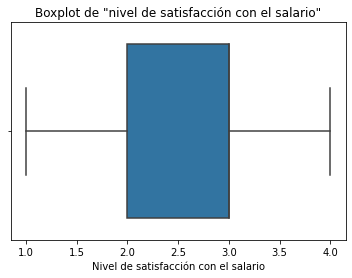

In [207]:
sns.boxplot(x=df_a['salary_satisfaction']).set(title='Boxplot de "nivel de satisfacción con el salario"')
plt.xlabel("Nivel de satisfacción con el salario")

<font color='MediumBlue'>
Aquí se puede ver que para la variable salary_satisfaction no es necesario realizar limpieza de datos ya que los valores mostrados son todos aceptables.

<font color='MediumBlue'>
Para analizar el comportamiento de los datos se hará los siguiente:<br>
- Graficar un jointplot con la variable años de experiencia y salario mensual neto para evaluar la intersección de la realización de ambas variables.<br>
- Armar una tabla de contingencias (normalizada) con las variables del nivel de estudio y género, acompañada de un heatmap.<br>
- Graficar un gráfico de puntos para los años de experiencia, satisfacción del salario y salario mensual neto.

Text(27.125, 0.5, 'Salario Mensual Neto')

<Figure size 576x288 with 0 Axes>

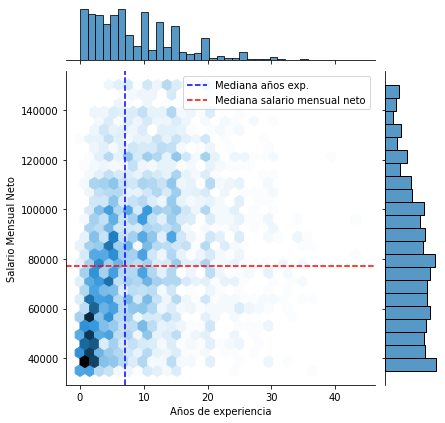

In [208]:
fig = plt.figure(figsize=(8,4))
g = sns.jointplot(data=df_a_2,x='profile_years_experience', y='salary_monthly_NETO', kind='hex')
plt.axvline(df_a_2['profile_years_experience'].median(), color='blue', linestyle='--', label='Mediana años exp.')
plt.axhline(df_a_2['salary_monthly_NETO'].median(), color='red', linestyle='--', label='Mediana salario mensual neto')
plt.legend()
plt.xlabel("Años de experiencia")
plt.ylabel("Salario Mensual Neto")

<font color='MediumBlue'>
Como se puede ver, la mayor densidad se concentra en los salarios más bajos y menos años de experiencia. Aunque también se pueden identificar salarios elevados (mayores a la mediana) dentro del rango de 0 a 10 años de experiencia. 

In [209]:
tab_cont=pd.crosstab(df_a_2['work_province'],df_a_2['profile_gender'],margins=True,margins_name='Subtotales',normalize=True).round(4)
tab_cont

profile_gender,Hombre,Mujer,Otros,Subtotales
work_province,,,,
Catamarca,0.0004,0.0000,0.0000,0.0004
Chaco,0.0038,0.0000,0.0002,0.0040
Chubut,0.0038,0.0000,0.0000,0.0038
Ciudad Autónoma de Buenos Aires,0.5015,0.1185,0.0034,0.6234
Corrientes,0.0024,0.0008,0.0000,0.0032
Córdoba,0.0623,0.0093,0.0002,0.0717
Entre Ríos,0.0087,0.0004,0.0002,0.0093
Formosa,0.0008,0.0000,0.0000,0.0008
GBA,0.0776,0.0083,0.0000,0.0858


Text(86.5, 0.5, 'Provincia donde trabaja')

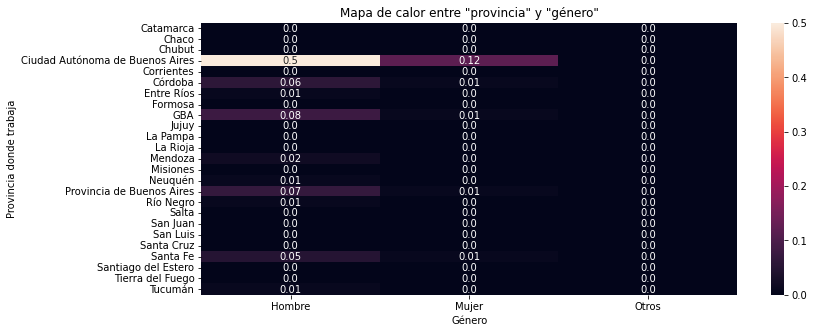

In [210]:
tab_cont_graf=pd.crosstab(df_a_2['work_province'],df_a_2['profile_gender'],normalize=True)
fig = plt.figure(figsize=(12,5))
sns.heatmap(tab_cont_graf.round(2),annot=True,fmt='0').set(title='Mapa de calor entre "provincia" y "género"')
plt.xlabel("Género")
plt.ylabel("Provincia donde trabaja")

<font color='MediumBlue'>
La proporción más significativa se halla en el par (Hombre, Ciudad Autónoma de Buenos Aires), seguido de (Mujer, Ciudad Autónoma de Buenos Aires). Claramente esto está marcado por la mayor proporción total de respuestas de personas que trabajan en le Ciudad Autónoma de Buenos Aires (0.62) frente al resto (0.38).<br>
Luego de todas las regiones que hacen referencia a la provincia de Buenos Aires, la siguiente en proporción es Córdoba, donde también se observa mayor proporción de hombres frente a las mujeres y otras opciones.

Text(0, 0.5, 'Años de experiencia')

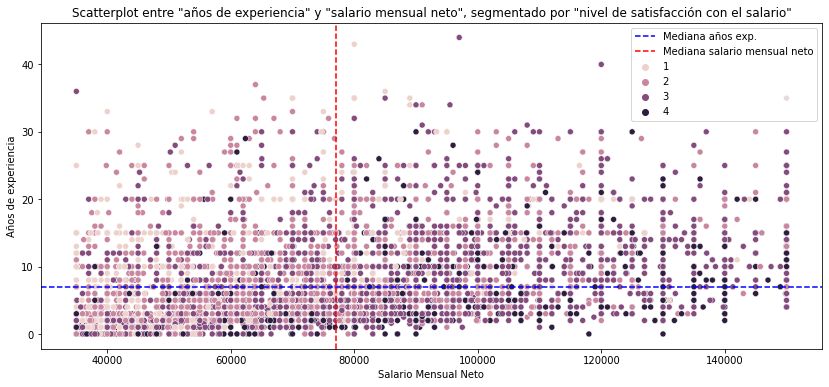

In [211]:
fig = plt.figure(figsize=(14,6))
sns.scatterplot(data=df_a_2,y='profile_years_experience', x='salary_monthly_NETO', hue='salary_satisfaction',legend='full')\
                            .set(title='Scatterplot entre "años de experiencia" y "salario mensual neto", segmentado por "nivel de satisfacción con el salario"')
plt.axhline(df_a_2['profile_years_experience'].median(), color='blue', linestyle='--', label='Mediana años exp.')
plt.axvline(df_a_2['salary_monthly_NETO'].median(), color='red', linestyle='--', label='Mediana salario mensual neto')
plt.legend()
plt.xlabel("Salario Mensual Neto")
plt.ylabel("Años de experiencia")

<font color='MediumBlue'>
Si bien se pueden ver puntos que representan cada uno de los niveles de satisfacción salarial a lo largo de todo el rango de salarios, se aprecia cierta tendecia de aumento de la satisfcción salarial conforme aumenta el salario mensual neto, como sería esperable. No obstante, se pueden identificar puntos de alta satisfacción en los salarios de todo el rango, y los puntos de menor satisfacción se hallan mayormente en las zonas de bajos salarios y muchos años de experiencia laboral.

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



<font color='MediumBlue'>
Para abordar esta pregunta se puede confeccionar un gráfico de puntos con cada una de las variables en los ejes para tener una primera idea de posible relación entre ambas. Luego, se calcula el índice de correlación entre ambas para determinar objetivamente si existe o no correlación.

Text(0, 0.5, 'Salario Mensual BRUTO')

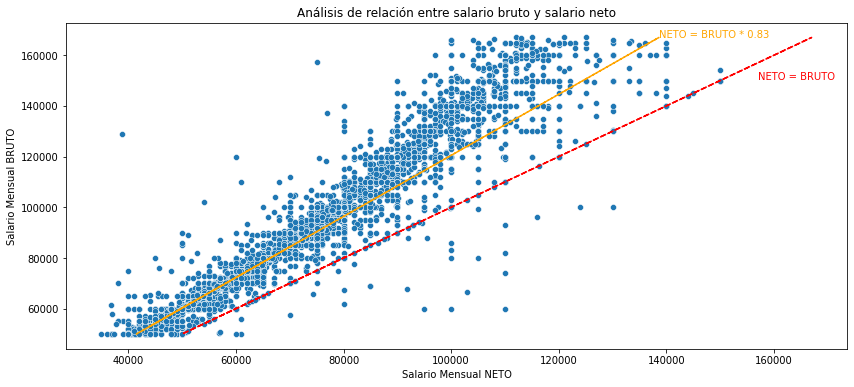

In [212]:
def salario_neto_identidad(salario_bruto):
    salario=salario_bruto
    return salario
def salario_neto_calculado(salario_bruto):
    salario=salario_bruto*0.83
    return salario

df_salarios=df_origen[['salary_monthly_NETO','salary_monthly_BRUTO']]
df_salarios=df_salarios.dropna()
#Se quitan valores extremos del salario mensual NETO
Q1 = df_salarios["salary_monthly_NETO"].quantile(.10)
Q3 = df_salarios["salary_monthly_NETO"].quantile(.90)
df_salarios = df_salarios[~((df_salarios['salary_monthly_NETO']<(Q1))|(df_salarios['salary_monthly_NETO']>(Q3)))]
#Se quitan valores extremos del salario mensual BRUTO
Q1 = df_salarios["salary_monthly_BRUTO"].quantile(.10)
Q3 = df_salarios["salary_monthly_BRUTO"].quantile(.90)
df_salarios = df_salarios[~((df_salarios['salary_monthly_BRUTO']<(Q1))|(df_salarios['salary_monthly_BRUTO']>(Q3)))]
fig = plt.figure(figsize=(14,6))
sns.scatterplot(data=df_salarios, x='salary_monthly_NETO', y='salary_monthly_BRUTO')\
                                    .set(title='Análisis de relación entre salario bruto y salario neto')
#Se grafica una línea donde el salario bruto y neto sean iguales, y
#una linea donde deberían ubicarse los salarios netos, en función a los salarios brutos * 0.83
x_neto_identidad=salario_neto_identidad(df_salarios['salary_monthly_BRUTO'])
x_neto_correcto=salario_neto_calculado(df_salarios['salary_monthly_BRUTO'])
y_bruto=df_salarios['salary_monthly_BRUTO']
plt.plot(x_neto_identidad,y_bruto,color='red',linestyle='--')
plt.text(int(df_salarios.salary_monthly_BRUTO.max()*0.94),int(df_salarios.salary_monthly_BRUTO.max()*0.9),'NETO = BRUTO',color='red')
plt.plot(x_neto_correcto,y_bruto,color='orange',linestyle='--')
plt.text(int(df_salarios.salary_monthly_BRUTO.max()*0.83),int(df_salarios.salary_monthly_BRUTO.max()),'NETO = BRUTO * 0.83',color='orange')
plt.xlabel("Salario Mensual NETO")
plt.ylabel("Salario Mensual BRUTO")

<font color='MediumBlue'>
A priori se puede ver que hay puntos que no tienen sentido, como ser todos aquellos que están sobre la recta roja donde ambos salarios coinciden. Muchos menos los que están por debajo de esta misma línea, donde el salario neto informado es mayor al salario bruto.
La relación esperada entre esta dos variables es la que se representa con la línea verde, donde el salario neto es el 83% del salario bruto.
Se va a calcular la relación entre ambos salarios informados, para cada una de las filas del dataframe.

<font color='MediumBlue'>
Tomando en consideración que se cuenta con una importante cantidad de datos (3823) se puede utilizar el indíce de Pearson para determinar la correlación entre las variables.

In [213]:
#Índice de correlación de Pearson
from scipy.stats import pearsonr
corr, _ = pearsonr(df_salarios['salary_monthly_NETO'], df_salarios['salary_monthly_BRUTO'])
print('Correlacion de Pearsons: %.3f' % corr)

Correlacion de Pearsons: 0.944


<font color='MediumBlue'>
Se concluye  que se puede quitar la columna de salario mensual bruto porque ambas variables tienen un alto grado de correlación de 0.944, aunque los montos indicados para el salario bruto y el salario neto no siguen la misma relación directa esperada que sería salario_neto = salario_bruto * 0.83.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [214]:
study_columns = ['salary_monthly_NETO','profile_studies_level']
df_c = df_a[study_columns]
df_c.dropna()

,salary_monthly_NETO,profile_studies_level
0,43000.0,Universitario
1,63000.0,Universitario
2,127000.0,Secundario
3,102000.0,Posgrado
4,106000.0,Universitario
...,...,...
6088,56450.0,Secundario
6089,130000.0,Universitario
6090,97000.0,Terciario
6091,71000.0,Universitario


Text(-15.075000000000003, 0.5, 'Salario Mensual Neto')

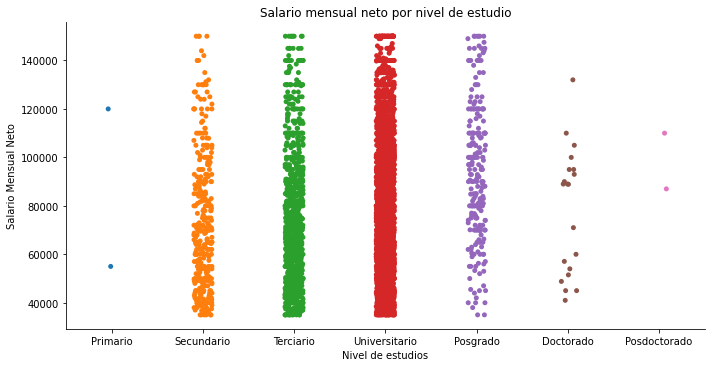

In [215]:
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado']
sns.catplot(data=df_c, y='salary_monthly_NETO',
                x='profile_studies_level', height=5, aspect=2, order=sorted_studies_levels)\
                .set(title='Salario mensual neto por nivel de estudio')
plt.xlabel("Nivel de estudios")
plt.ylabel("Salario Mensual Neto")

In [216]:
df_c_group = df_c.groupby('profile_studies_level')['salary_monthly_NETO'].agg(['count']).sort_values('count',ascending=False)
df_c_group.reset_index()

,profile_studies_level,count
0,Universitario,3236
1,Terciario,910
2,Secundario,345
3,Posgrado,237
4,Doctorado,20
5,Posdoctorado,2
6,Primario,2


<font color='MediumBlue'>
Se eligen como subpoblaciones numerosas aquellos casos donde el nivel de estudio es "Universitario" o "Tercierio", como se puede ver tanto en el gráfico como tabla anterieores, son los dos niveles con más casos.<br>
A continuación, se calculas las medidas de centralización y de disperción para las dos subpoblaciones elegidas, y se grafican los histogramas del salario mensual neto separado y comparativamente para estos dos subgrupos.

In [217]:
selected_group=['Universitario','Terciario']
df_ter = df_c[(df_c.profile_studies_level == 'Terciario')]['salary_monthly_NETO']
print('Medidas para Terciarios')
print(df_ter.describe().round(2))

df_uni = df_c[(df_c.profile_studies_level == 'Universitario')]['salary_monthly_NETO']
print('**************************')
print('Medidas para Universitarios')
print(df_uni.describe().round(2))

Medidas para Terciarios
count       910.00
mean      74490.66
std       27475.45
min       35000.00
25%       52000.00
50%       70000.00
75%       91000.00
max      150000.00
Name: salary_monthly_NETO, dtype: float64
**************************
Medidas para Universitarios
count      3236.00
mean      80746.35
std       28434.70
min       35000.00
25%       57000.00
50%       80000.00
75%      100000.00
max      150000.00
Name: salary_monthly_NETO, dtype: float64


Text(0, 0.5, 'Frecuencia')

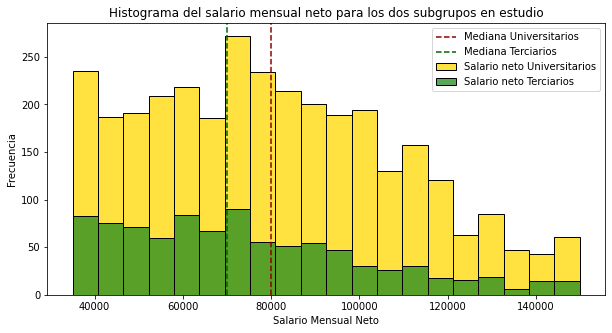

In [218]:
fig = plt.figure(figsize=(10,5))

sns.histplot(df_uni, color='gold', bins=20)
sns.histplot(df_ter, color='forestgreen', bins=20)\
            .set(title='Histograma del salario mensual neto para los dos subgrupos en estudio')
plt.axvline(df_uni.median(), color='DarkRed', linestyle='--', label='Mediana salario NETO Universitarios')
plt.axvline(df_ter.median(), color='DarkGreen', linestyle='--', label='Mediana salario NETO Terciarios')
plt.legend(['Mediana Universitarios','Mediana Terciarios','Salario neto Universitarios','Salario neto Terciarios'])
plt.xlabel("Salario Mensual Neto")
plt.ylabel("Frecuencia")

<font color='MediumBlue'>
A partir de los histogramas y la estadística descriptiva para estos dos subgrupos se podría indicar primeramente que el salario mensual neto y el nivel de estudio no son variables independientes. La dispersión dentro de los grupos es similar y dada la limpieza de datos que se realizó, los salarios mínimos y máximos coinciden para los dos subgrupos. Sin embargo, se puede ver que la mediana es mayor en el subgrupo "Universitarios".<br>
A continuación, se va a intentar demostrar la dependencia de las variables calculando las probabilidades de tener un salario superior a la mediana para ambos grupos y compararla con la probabilidad de tener un salario superior a la mediana de toda la subpoblación.

In [219]:
df_c_2=df_c[df_c.profile_studies_level.isin(selected_group)]
salario_mediana=df_c_2['salary_monthly_NETO'].median()
prob_salario_mediana_universitarios=len(df_c_2[(df_c_2.salary_monthly_NETO > salario_mediana) &\
                                        (df_c_2.profile_studies_level=='Universitario')])/len(df_c_2)
prob_salario_mediana_terciarios=len(df_c_2[(df_c_2.salary_monthly_NETO > salario_mediana) &\
                                        (df_c_2.profile_studies_level=='Terciario')])/len(df_c_2)
prob_salario_mediana=len(df_c_2[(df_c_2.salary_monthly_NETO > salario_mediana)])/len(df_c_2)
print('Probabilidad de tener salario mayor a la mediana y ser universitario: ',round(prob_salario_mediana_universitarios,4))
print('Probabilidad de tener salario mayor a la mediana y ser terciario: ',round(prob_salario_mediana_terciarios,4))
print('Probabilidad de tener salario mayor a la mediana: ',round(prob_salario_mediana,4))

Probabilidad de tener salario mayor a la mediana y ser universitario:  0.3938
Probabilidad de tener salario mayor a la mediana y ser terciario:  0.0864
Probabilidad de tener salario mayor a la mediana:  0.4802


<font color='MediumBlue'>
Claramente, ambas variables no son independientes. Si bien se pueden hallar casos de salarios mayores a la mediana en los subgrupos, es mayor la probabilidad de lograrlo si se tiene un nivel de estudios "Universitario".

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


In [220]:
study_columns = ['salary_monthly_NETO','profile_age','profile_gender']
df_d = df_a[study_columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frecuencia')

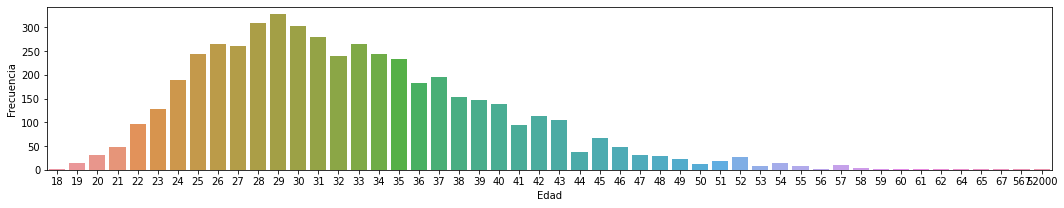

In [221]:
fig = plt.figure(figsize=(18,3))
sns.countplot(df_d['profile_age'])
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

In [222]:
registros_no_aceptables=df_d[(df_d['profile_age']>65)]
registros_no_aceptables.sort_values('profile_age',ascending=False)

,salary_monthly_NETO,profile_age,profile_gender
5752,52000.0,52000,Hombre
1659,100000.0,567,Hombre
1096,120000.0,67,Hombre


<font color='MediumBlue'>
Analizando el gráfico anterior, se puede ver que es necesario limpiar los registros ya que habría valores no aceptables. Por esto se van a tomar los registros con edad menor o igual a 67.

In [223]:
df_d=df_d[(df_d['profile_age']<=67)]
df_d.dropna()

,salary_monthly_NETO,profile_age,profile_gender
0,43000.0,26,Mujer
1,63000.0,29,Hombre
2,127000.0,22,Mujer
3,102000.0,39,Hombre
4,106000.0,32,Hombre
...,...,...,...
6088,56450.0,32,Hombre
6089,130000.0,32,Hombre
6090,97000.0,37,Hombre
6091,71000.0,38,Hombre


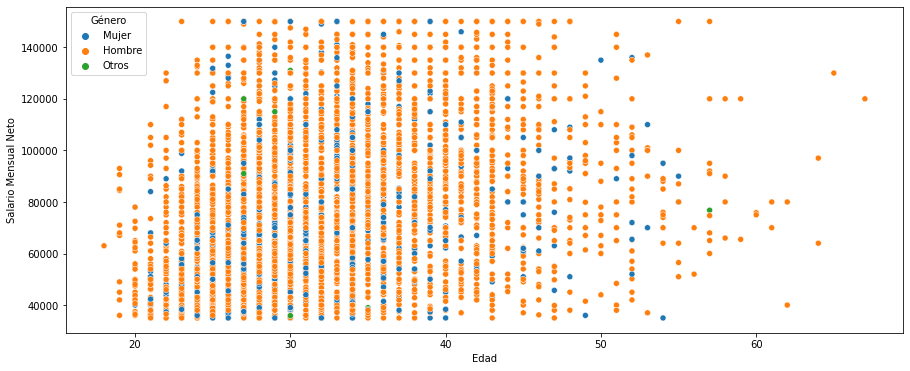

In [224]:
fig = plt.figure(figsize=(15,6))
sns.scatterplot(x= 'profile_age', y='salary_monthly_NETO', hue='profile_gender', data=df_d, legend='full')
plt.xlabel("Edad")
plt.ylabel("Salario Mensual Neto")
plt.legend(title='Género')

<font color='MediumBlue'>
Como existe una gran superposición de puntos, se va graficar sólo los puntos que correspondan a salario mensual neto superior a la mediana. Esto favorece la lectura y análisis de la información que provee el gráfico.

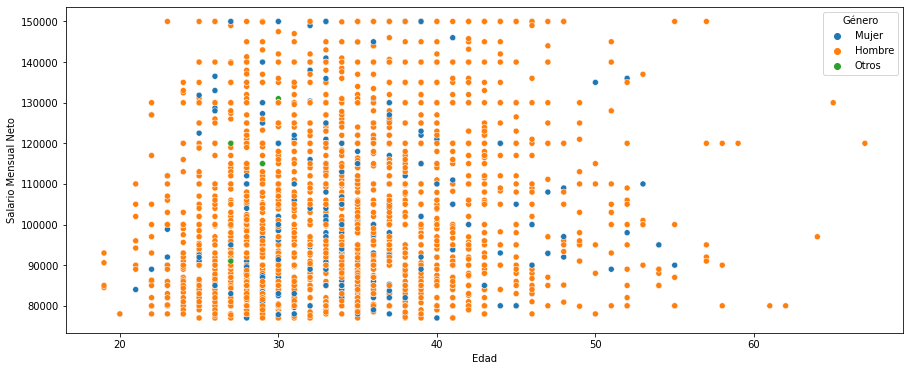

In [225]:
fig = plt.figure(figsize=(15,6))
salario_mediana=df_c_2['salary_monthly_NETO'].median()
sns.scatterplot(x= 'profile_age', y='salary_monthly_NETO', hue='profile_gender', data=df_d[(df_d['salary_monthly_NETO']>salario_mediana)], legend='full')
plt.xlabel("Edad")
plt.ylabel("Salario Mensual Neto")
plt.legend(title='Género')

<font color='MediumBlue'>
También puede ser conveniente representar las series de puntos en gráficos separados y cuidando que las escalas sean iguales para que la visualización sea fácilmente comparable.

Text(0, 0.5, 'Salario Mensual Neto')

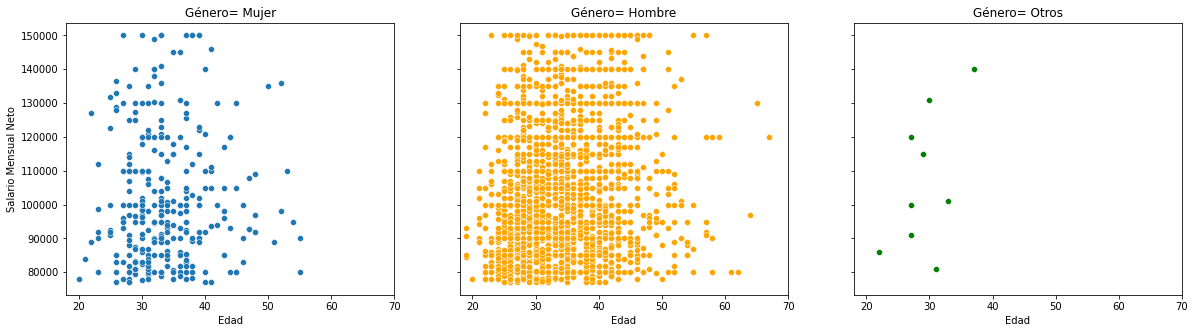

In [226]:
df_M = df_d[(df_d.profile_gender == 'Mujer')&(df_d.salary_monthly_NETO>salario_mediana)]
df_H = df_d[(df_d.profile_gender == 'Hombre')&(df_d.salary_monthly_NETO>salario_mediana)]
df_O = df_d[(df_d.profile_gender == 'Otros')&(df_d.salary_monthly_NETO>salario_mediana)]
fig, ax = plt.subplots(ncols=3, figsize=(20,5), sharey=True)
ax[0].set_xlim(left=18, right=70)
ax[0].set_xlabel('Edad')
ax[0].set_title('Género= Mujer')
sns.scatterplot(x = 'profile_age', y='salary_monthly_NETO', palette='Blue', data=df_M, ax=ax[0])
ax[1].set_xlim(left=18, right=70)
ax[1].set_xlabel('Edad')
ax[1].set_title('Género= Hombre')
sns.scatterplot(x = 'profile_age', y='salary_monthly_NETO',color='Orange',data=df_H, ax=ax[1])
ax[2].set_xlim(left=18, right=70)
ax[2].set_xlabel('Edad')
ax[2].set_title('Género= Otros')
sns.scatterplot(x = 'profile_age', y='salary_monthly_NETO', color='Green', data=df_O, ax=ax[2])
ax[0].set_ylabel("Salario Mensual Neto")

<font color='MediumBlue'>
A partir de la visualización de los gráficos, podemos concluir que la edad no sería un factor determinante del salario mensual neto. También se puede ver que es mayor la proporción de hombres con salarios superiores a la mediana, frente a mujeres y otros.